In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\t3mar\Career Foundry\Data Analytics\Project 4 Instacart'

In [3]:
# import data
ord_prd_merge = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'exercise 4 8.pkl'))

# Bar chart

<Axes: >

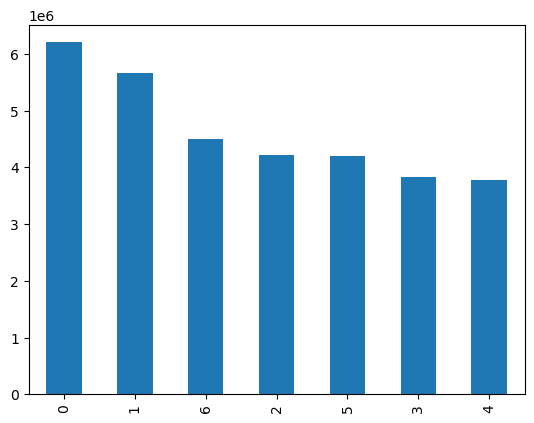

In [4]:
# bar chart
ord_prd_merge['weekday'].value_counts().plot.bar()

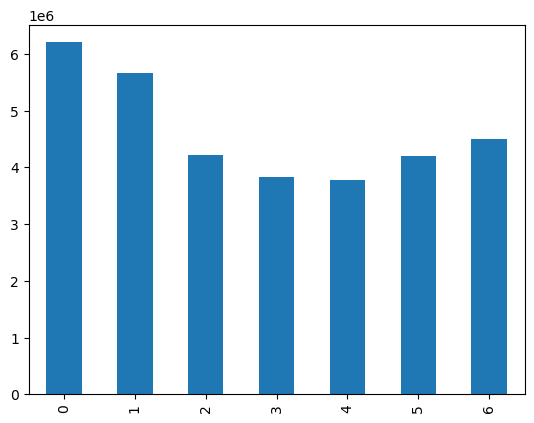

In [5]:
# bar chart sorted by index
bar = ord_prd_merge['weekday'].value_counts().sort_index().plot.bar()

In [6]:
# sort index used on vc table
ord_prd_merge['weekday'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: weekday, dtype: int64

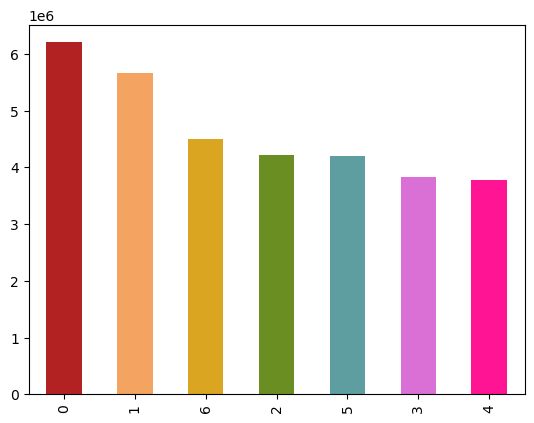

In [7]:
bar = ord_prd_merge['weekday'].value_counts().plot.bar(color = [ 'firebrick', 'sandybrown', 'goldenrod', 'olivedrab', 'cadetblue', 'orchid', 'deeppink'])

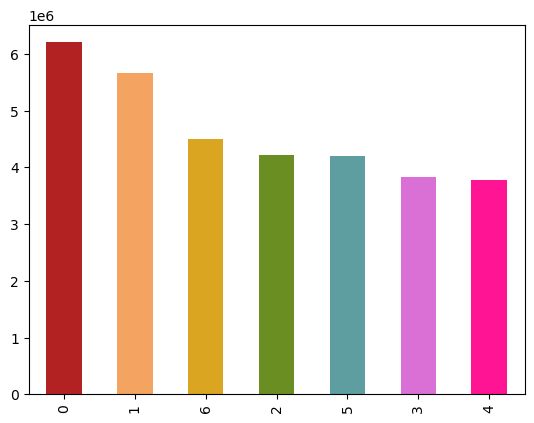

In [8]:
bar.figure

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_orders_dow.png'))

# Histogram

<Axes: ylabel='Frequency'>

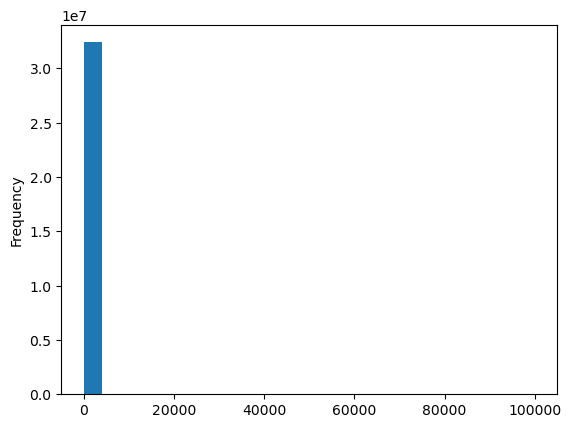

In [10]:
ord_prd_merge['prices'].plot.hist(bins = 25)

# Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

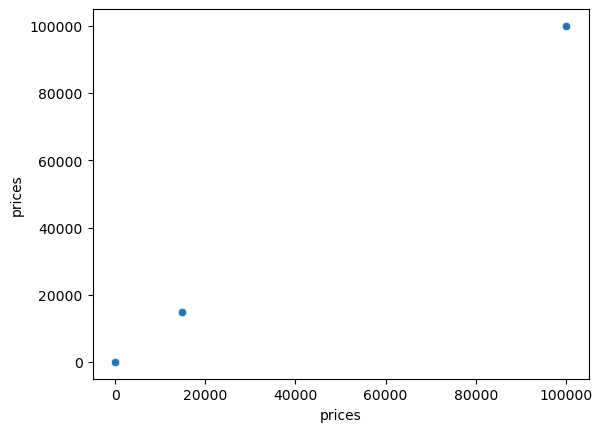

In [11]:
sns.scatterplot(x = 'prices', y = 'prices', data = ord_prd_merge)

# Outliers

In [12]:
ord_prd_merge.loc[ord_prd_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,weekday,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department_id,prices,_merge,Hourly Orders,max_order,loyalty_flag,mean_price,price_flag,order_frequency,frequency_flag
10030345,171,912404,17,12,2,14,5.0,21553,5,0,...,16,14900.0,both,Most orders,40,regular customer,108.648299,High spender,5.0,frequent customer
10030346,181,603376,17,22,6,16,4.0,21553,3,1,...,16,14900.0,both,Most orders,40,regular customer,108.648299,High spender,5.0,frequent customer
10030347,1944,3264360,135,2,2,21,13.0,21553,6,0,...,16,14900.0,both,Least orders,4,new customer,1154.792308,High spender,12.0,regular customer
10030348,1945,892534,135,3,0,8,12.0,21553,3,1,...,16,14900.0,both,Average orders,4,new customer,1154.792308,High spender,12.0,regular customer
10030349,5708,229704,342,8,1,19,30.0,21553,9,0,...,16,14900.0,both,Average orders,16,regular customer,114.426619,High spender,23.0,non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,29,0,8,4.0,33664,1,0,...,16,99999.0,both,Average orders,39,regular customer,1106.743956,High spender,4.0,frequent customer
29166210,3386544,2363282,204099,31,0,9,2.0,33664,1,1,...,16,99999.0,both,Most orders,39,regular customer,1106.743956,High spender,4.0,frequent customer
29166211,3391313,3181945,204395,13,3,15,8.0,33664,25,0,...,16,99999.0,both,Most orders,15,regular customer,451.153540,High spender,5.0,frequent customer
29166212,3405096,2486215,205227,7,3,20,4.0,33664,8,0,...,16,99999.0,both,Least orders,12,regular customer,1178.381871,High spender,12.0,regular customer


In [13]:
# set outliers as nulls
ord_prd_merge.loc[ord_prd_merge['prices'] > 100, 'prices'] = np.nan

In [14]:
ord_prd_merge['prices'].max()

25.0

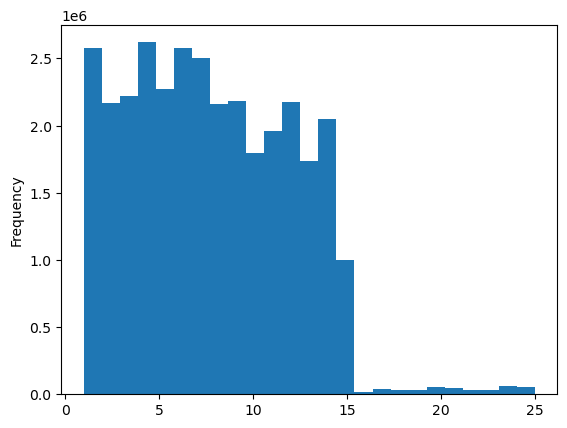

In [15]:
hist = ord_prd_merge['prices'].plot.hist(bins = 25)

In [16]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'histogram_prices.png'))

# Sample

In [17]:
# create random seed
np.random.seed(4)

In [18]:
# set ration of 70%
dev = np.random.rand(len(ord_prd_merge)) <= 0.7

In [19]:
# assign larger portion
big = ord_prd_merge[dev]

In [20]:
# assign sample
small = ord_prd_merge[~dev]

In [21]:
len(ord_prd_merge)

32404859

In [22]:
len(big) + len(small)

32404859

# Line

In [23]:
# remove useless columns
sample_prc_wkdy = small[['weekday','prices']]

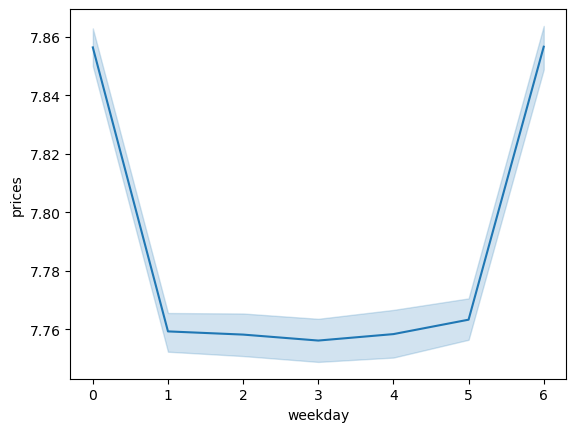

In [24]:
#create graph
line = sns.lineplot (data = sample_prc_wkdy, x = 'weekday', y = 'prices')